In [ ]:
!pip install kafka-python

In [ ]:
import pandas as pd
from kafka import KafkaProducer
from time import sleep
from json import dumps
import json

In [ ]:
!wget https://raw.githubusercontent.com/harshitgupta1998/data-streaming/refs/heads/main/Mortgage%20Lending.csv

--2025-01-04 11:08:32--  https://raw.githubusercontent.com/harshitgupta1998/data-streaming/refs/heads/main/Mortgage%20Lending.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19788 (19K) [text/plain]
Saving to: ‘Mortgage Lending.csv.5’

Mortgage Lending.cs 100%[===================>]  19.32K  --.-KB/s    in 0.001s  

2025-01-04 11:08:32 (30.9 MB/s) - ‘Mortgage Lending.csv.5’ saved [19788/19788]



In [ ]:
df = pd.read_csv("Mortgage Lending.csv")

In [ ]:
df

,Date,NL_Banks,NL_Specialist_Lenders,NL_Others,NL_Total,BO_Banks,BO_Specialist Lenders,BO_Others,BO_Total,LP_House_Purchase,LP_Remortgaging,LP_Other
0,01/01/1999,1732,47,5,1784,420518,27346,2297,450161,NaN,NaN,NaN
1,01/02/1999,299,1186,5,1490,420801,28529,2296,451626,NaN,NaN,NaN
2,01/03/1999,2588,245,5,2839,423354,29722,2295,455371,NaN,NaN,NaN
3,01/04/1999,2727,337,3,3067,425679,30296,2292,458267,NaN,NaN,NaN
4,01/05/1999,2606,209,3,2818,428273,30503,2288,461064,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
293,01/06/2023,1962,-41,113,2034,1452768,112834,60267,1625869,12220.0,7742.0,771.0
294,01/07/2023,-317,-264,113,-468,1452724,112518,60380,1625622,11736.0,7072.0,644.0
295,01/08/2023,2403,-171,113,2345,1455328,112210,60493,1628031,13852.0,7523.0,619.0
296,01/09/2023,182,-228,113,67,1455904,111893,60605,1628403,11954.0,6873.0,644.0


In [ ]:

print(df.info())
print(df.describe())
print(df.describe(include='object'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   298 non-null    object 
 1   NL_Banks               298 non-null    int64  
 2   NL_Specialist_Lenders  298 non-null    int64  
 3   NL_Others              298 non-null    int64  
 4   NL_Total               298 non-null    int64  
 5   BO_Banks               298 non-null    int64  
 6   BO_Specialist Lenders  298 non-null    int64  
 7   BO_Others              298 non-null    int64  
 8   BO_Total               298 non-null    int64  
 9   LP_House_Purchase      130 non-null    float64
 10  LP_Remortgaging        129 non-null    float64
 11  LP_Other               130 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 28.1+ KB
None
           NL_Banks  NL_Specialist_Lenders   NL_Others      NL_Total  \
count    298.000000        

<Figure size 1000x600 with 0 Axes>

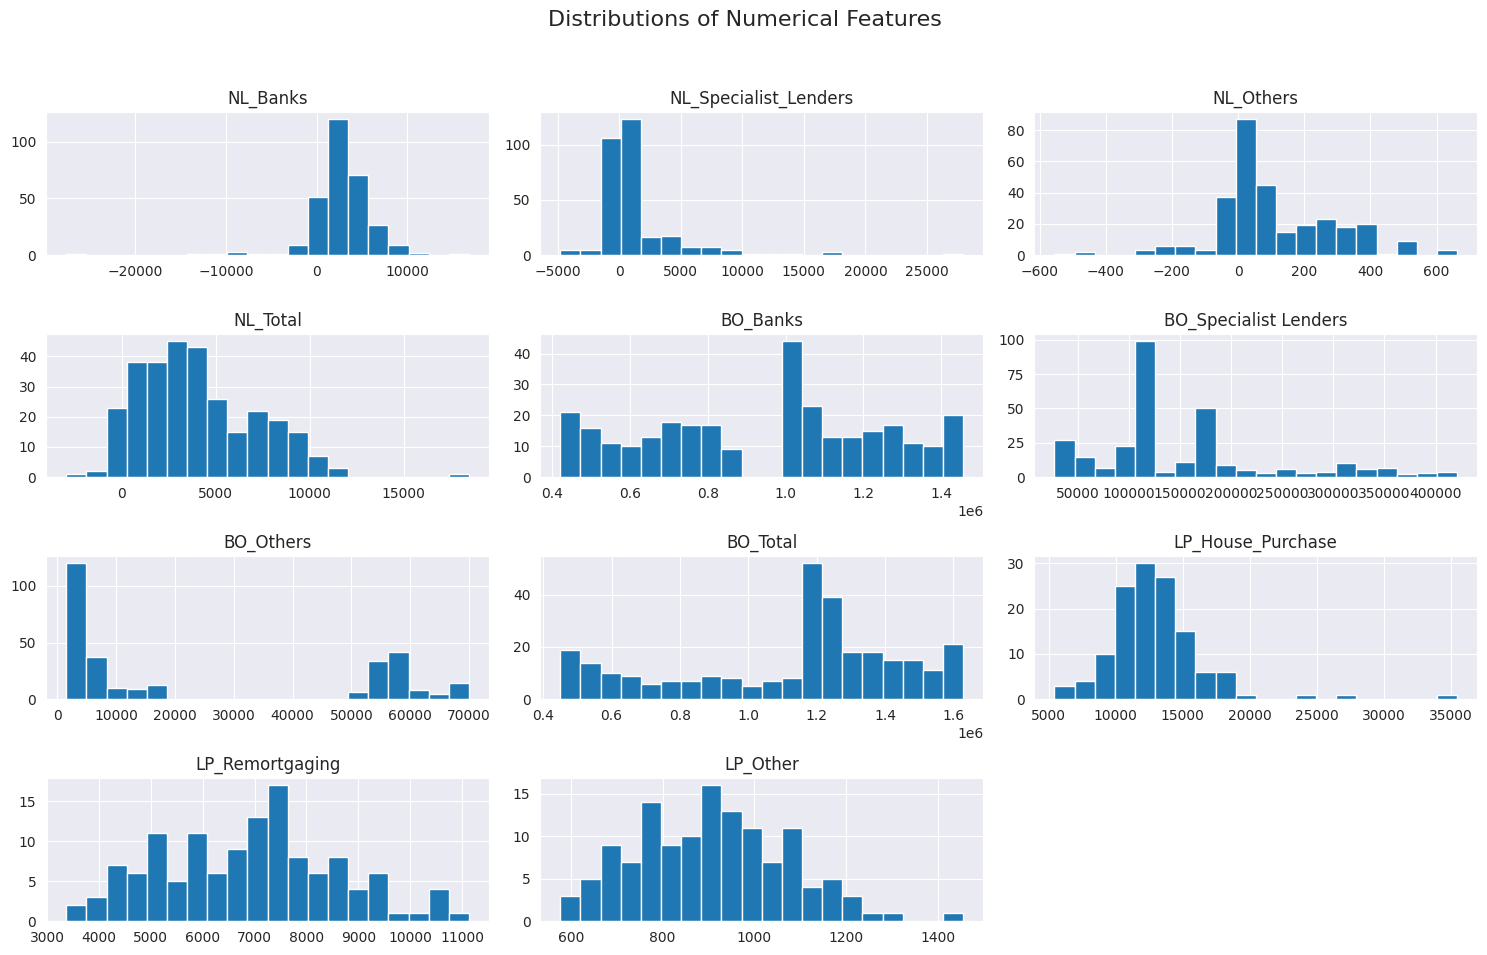

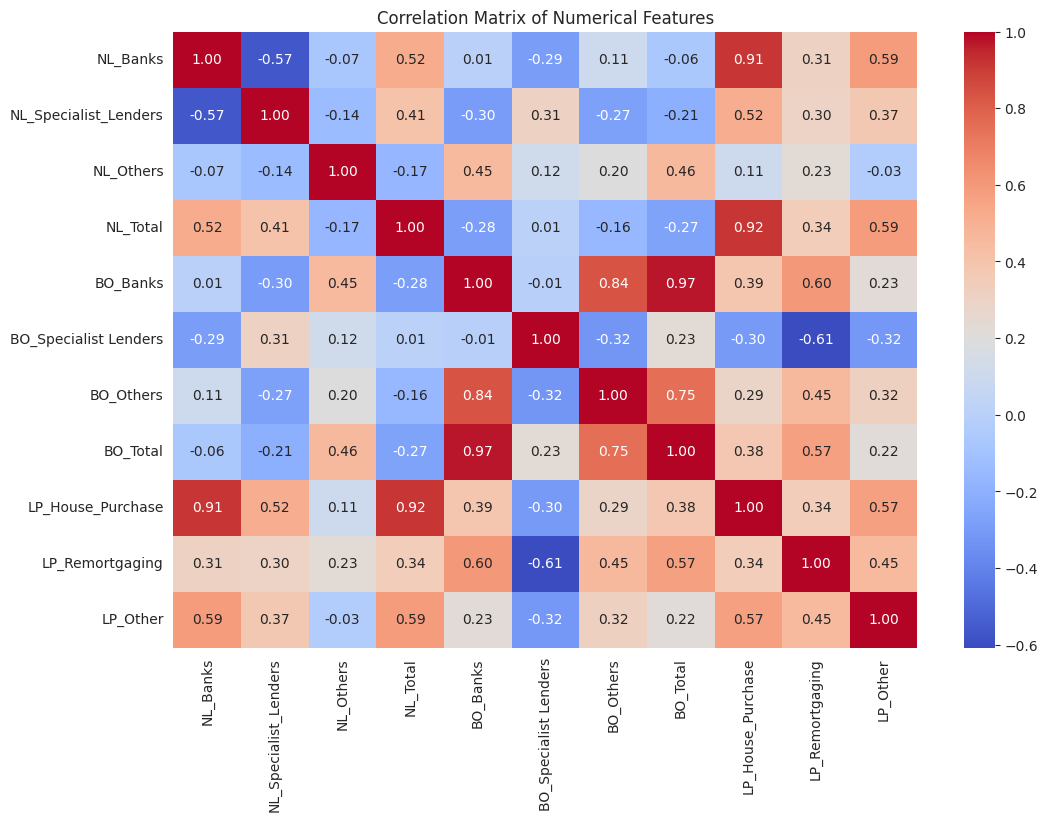

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features visualization
plt.figure(figsize=(10, 6))
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Correlation matrix for numerical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:

import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Assuming your DataFrame is named 'df'
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df = remove_outliers(df, col)

df

,Date,NL_Banks,NL_Specialist_Lenders,NL_Others,NL_Total,BO_Banks,BO_Specialist Lenders,BO_Others,BO_Total,LP_House_Purchase,LP_Remortgaging,LP_Other
168,01/01/2013,369,-207,363,525,1036106,177239,12179,1225525,7037.0,3942.0,742.0
169,01/02/2013,-453,-195,363,-285,1035473,176956,12542,1224971,6691.0,3371.0,641.0
170,01/03/2013,88,-253,363,198,1035158,176627,12905,1224690,7459.0,3485.0,688.0
171,01/04/2013,-239,-279,410,-109,1034925,176152,13315,1224393,7644.0,4097.0,723.0
172,01/05/2013,1000,-96,410,1315,1035699,176136,13725,1225560,9586.0,4708.0,740.0
...,...,...,...,...,...,...,...,...,...,...,...,...
293,01/06/2023,1962,-41,113,2034,1452768,112834,60267,1625869,12220.0,7742.0,771.0
294,01/07/2023,-317,-264,113,-468,1452724,112518,60380,1625622,11736.0,7072.0,644.0
295,01/08/2023,2403,-171,113,2345,1455328,112210,60493,1628031,13852.0,7523.0,619.0
296,01/09/2023,182,-228,113,67,1455904,111893,60605,1628403,11954.0,6873.0,644.0


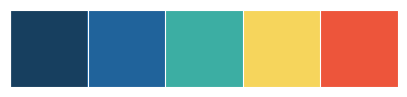

In [ ]:
# Import the required packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

# Plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

### Define the colour scheme
c1 = "#173f5f"
c2 = "#20639b"
c3 = "#3caea3"
c4 = "#f6d55c"
c5 = "#ed553b"

custom_palette = [c1, c2, c3, c4, c5]
sns.palplot(sns.color_palette(custom_palette))

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df.head()

,NL_Banks,NL_Specialist_Lenders,NL_Others,NL_Total,BO_Banks,BO_Specialist Lenders,BO_Others,BO_Total,LP_House_Purchase,LP_Remortgaging,LP_Other
Date,,,,,,,,,,,
2013-01-01,369,-207,363,525,1036106,177239,12179,1225525,7037.0,3942.0,742.0
2013-02-01,-453,-195,363,-285,1035473,176956,12542,1224971,6691.0,3371.0,641.0
2013-03-01,88,-253,363,198,1035158,176627,12905,1224690,7459.0,3485.0,688.0
2013-04-01,-239,-279,410,-109,1034925,176152,13315,1224393,7644.0,4097.0,723.0
2013-05-01,1000,-96,410,1315,1035699,176136,13725,1225560,9586.0,4708.0,740.0


In [ ]:
df_balance = df.loc[:, df.columns.str.contains('BO_')]
df_balance.columns = df_balance.columns.str.removeprefix("BO_")
df_balance.head()

,Banks,Specialist Lenders,Others,Total
Date,,,,
2013-01-01,1036106,177239,12179,1225525
2013-02-01,1035473,176956,12542,1224971
2013-03-01,1035158,176627,12905,1224690
2013-04-01,1034925,176152,13315,1224393
2013-05-01,1035699,176136,13725,1225560


In [ ]:
df_plot = df_balance.copy()

col = 'Banks'
color = c1
trace1 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

col = 'Specialist Lenders'
color = c3
trace2 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

col = 'Others'
color = c5
trace3 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

trace_data = [trace1, trace2, trace3]

layout = dict(title = 'Balance Outstanding, £m', xaxis=dict(title= 'Date'))
fig = dict(data = trace_data, layout = layout)
iplot(fig)

In [ ]:
df_lending_purpose = df.loc[:, df.columns.str.contains('LP_')]
df_lending_purpose.columns = df_lending_purpose.columns.str.removeprefix("LP_")
df_lending_purpose.head()

,House_Purchase,Remortgaging,Other
Date,,,
2013-01-01,7037.0,3942.0,742.0
2013-02-01,6691.0,3371.0,641.0
2013-03-01,7459.0,3485.0,688.0
2013-04-01,7644.0,4097.0,723.0
2013-05-01,9586.0,4708.0,740.0


In [ ]:
df_plot = df_lending_purpose.copy()

col = 'House_Purchase'
color = c1
trace1 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

col = 'Remortgaging'
color = c3
trace2 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

col = 'Other'
color = c5
trace3 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

trace_data = [trace1, trace2, trace3]

layout = dict(title = 'Lending by Purpose, £m', xaxis=dict(title= 'Date'))
fig = dict(data = trace_data, layout = layout)
iplot(fig)

In [ ]:
df_net_lending = df.loc[:, df.columns.str.contains('NL_')]
df_net_lending.columns = df_net_lending.columns.str.removeprefix("NL_")
df_net_lending.head()

,Banks,Specialist_Lenders,Others,Total
Date,,,,
2013-01-01,369,-207,363,525
2013-02-01,-453,-195,363,-285
2013-03-01,88,-253,363,198
2013-04-01,-239,-279,410,-109
2013-05-01,1000,-96,410,1315


In [ ]:
df_plot = df_net_lending.copy()

col = 'Banks'
color = c1
trace1 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

col = 'Specialist_Lenders'
color = c3
trace2 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

col = 'Others'
color = c5
trace3 = go.Scatter(x = df_plot.index,
                    y = df_plot[col],
                    mode = "lines",
                    name = col,
                    marker = dict(color=color),
                    text= col)

trace_data = [trace1, trace2, trace3]

layout = dict(title = 'Lending by Sector, £m', xaxis=dict(title= 'Date'))
fig = dict(data = trace_data, layout = layout)
iplot(fig)

          NL_Banks  NL_Specialist_Lenders   NL_Others     NL_Total  \
count   118.000000             118.000000  118.000000   118.000000   
mean   2867.101695              76.279661  171.737288  3115.186441   
std    1800.907745             325.481678  196.382647  1936.976527   
min   -1492.000000            -533.000000 -296.000000 -1047.000000   
25%    1762.750000            -198.750000   79.000000  1886.750000   
50%    2942.000000             118.500000  182.500000  3200.500000   
75%    3932.000000             311.500000  330.750000  4329.500000   
max    7285.000000             997.000000  520.000000  8379.000000   

           BO_Banks  BO_Specialist Lenders     BO_Others      BO_Total  \
count  1.180000e+02             118.000000    118.000000  1.180000e+02   
mean   1.222426e+06          122162.635593  50479.135593  1.395068e+06   
std    1.353832e+05           23722.315905  17002.295991  1.311710e+05   
min    1.034925e+06          103915.000000  12179.000000  1.224393e+06   

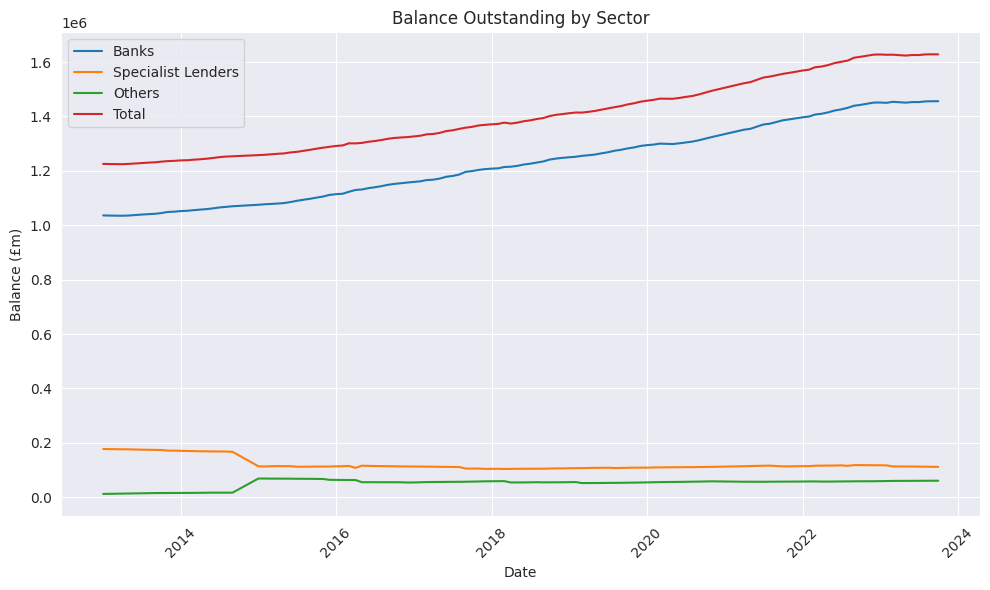

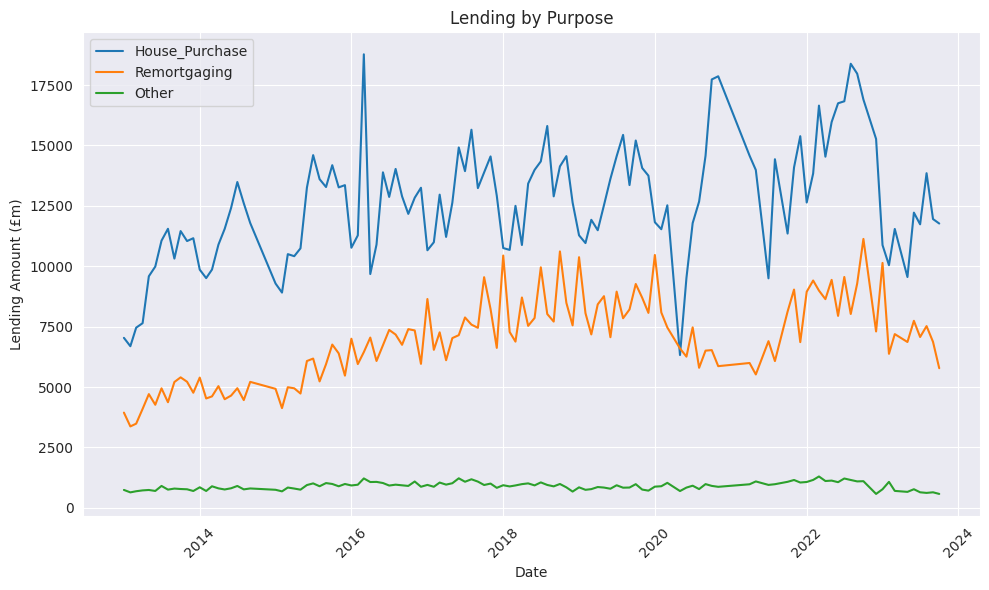

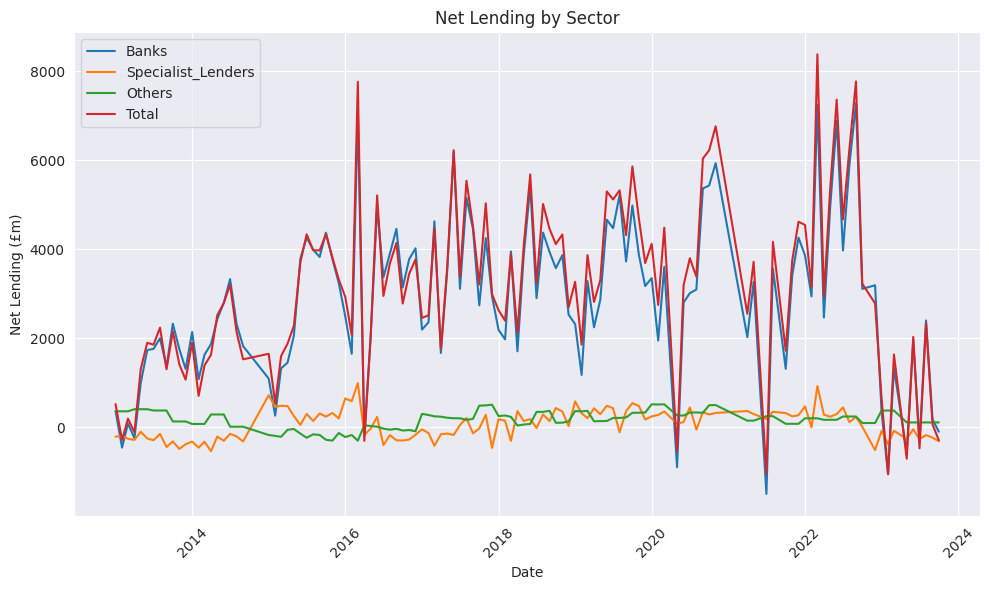

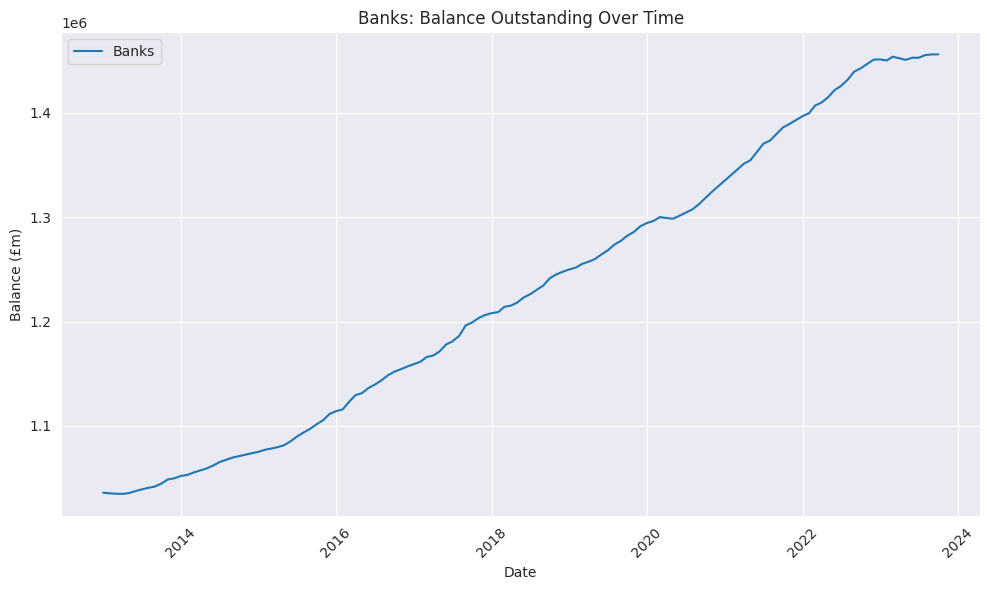

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame (as defined in the previous code)

# Summary statistics for all columns
print(df.describe(include='all')) # Include all data types in the summary

# Visualizations with explanations and legends


# Function to create line plots with improved legends
def create_lineplot(df_plot, title, ylabel):
    plt.figure(figsize=(10, 6))
    for column in df_plot.columns:
      sns.lineplot(data=df_plot[column], label=column) # Added label for legend
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend() # Show the legend
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


# Balance Outstanding Visualization
create_lineplot(df_balance, 'Balance Outstanding by Sector', 'Balance (£m)')
# Explanation: This line plot shows the trend of balance outstanding over time for each lending sector.

# Lending by Purpose Visualization
create_lineplot(df_lending_purpose, 'Lending by Purpose', 'Lending Amount (£m)')
# Explanation: This visualizes the distribution of lending across different purposes (House Purchase, Remortgaging, Other).


# Lending by Sector Visualization
create_lineplot(df_net_lending, 'Net Lending by Sector', 'Net Lending (£m)')
# Explanation: This plot illustrates the net lending activity for various sectors over the given period.

# Individual Sector Analysis (Example: Banks)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_balance['Banks'], label='Banks') # Added label for legend
plt.title('Banks: Balance Outstanding Over Time')
plt.xlabel('Date')
plt.ylabel('Balance (£m)')
plt.legend() # Show the legend
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Explanation: This plot provides a closer look at the trend of balance outstanding specifically for 'Banks'.


#Further visualizations can be created in a similar way for specific insights, including:
# - Histograms for distributions (e.g., distribution of lending amounts)
# - Box plots for comparing distributions across categories.
# - Scatter plots for relationships between variables.
#Remember to add labels and titles to all visualizations for better clarity.

In [ ]:
df.head()

,NL_Banks,NL_Specialist_Lenders,NL_Others,NL_Total,BO_Banks,BO_Specialist Lenders,BO_Others,BO_Total,LP_House_Purchase,LP_Remortgaging,LP_Other
Date,,,,,,,,,,,
2013-01-01,369,-207,363,525,1036106,177239,12179,1225525,7037.0,3942.0,742.0
2013-02-01,-453,-195,363,-285,1035473,176956,12542,1224971,6691.0,3371.0,641.0
2013-03-01,88,-253,363,198,1035158,176627,12905,1224690,7459.0,3485.0,688.0
2013-04-01,-239,-279,410,-109,1034925,176152,13315,1224393,7644.0,4097.0,723.0
2013-05-01,1000,-96,410,1315,1035699,176136,13725,1225560,9586.0,4708.0,740.0


In [ ]:
df.describe()

,NL_Banks,NL_Specialist_Lenders,NL_Others,NL_Total,BO_Banks,BO_Specialist Lenders,BO_Others,BO_Total,LP_House_Purchase,LP_Remortgaging,LP_Other
count,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000
mean,2867.101695,76.279661,171.737288,3115.186441,1.222426e+06,122162.635593,50479.135593,1.395068e+06,12601.618644,6948.915254,902.559322
std,1800.907745,325.481678,196.382647,1936.976527,1.353832e+05,23722.315905,17002.295991,1.311710e+05,2437.377920,1713.517617,155.470257
min,-1492.000000,-533.000000,-296.000000,-1047.000000,1.034925e+06,103915.000000,12179.000000,1.224393e+06,6325.000000,3371.000000,577.000000
25%,1762.750000,-198.750000,79.000000,1886.750000,1.098399e+06,108910.250000,53805.750000,1.278385e+06,10968.500000,5784.500000,775.500000
50%,2942.000000,118.500000,182.500000,3200.500000,1.211594e+06,112974.000000,56284.500000,1.373227e+06,12635.000000,7014.000000,906.500000
75%,3932.000000,311.500000,330.750000,4329.500000,1.311160e+06,116141.000000,58564.750000,1.479442e+06,14057.500000,8048.750000,1013.000000
max,7285.000000,997.000000,520.000000,8379.000000,1.456021e+06,177239.000000,68883.000000,1.628403e+06,18773.000000,11131.000000,1299.000000


In [ ]:
producer = KafkaProducer(bootstrap_servers=['54.236.97.196:9092'], #change ip here
                         value_serializer=lambda x:
                         dumps(x).encode('utf-8'))

In [ ]:
while True:
    dict_stock = df.sample(1).to_dict(orient="records")[0]
    producer.send('demo_testing2', value=dict_stock)
    sleep(1)

ERROR:kafka.conn:<BrokerConnection node_id=0 host=54.236.97.196:9092 <connected> [IPv4 ('54.236.97.196', 9092)]>: Error receiving network data closing socket
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/kafka/conn.py", line 1090, in _recv
    data = self._sock.recv(self.config['sock_chunk_bytes'])
ConnectionResetError: [Errno 104] Connection reset by peer
ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting> [IPv4 ('54.236.97.196', 9092)]> returned error 111. Disconnecting.
ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting> [IPv4 ('54.236.97.196', 9092)]> returned error 111. Disconnecting.
ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting> [IPv4 ('54.236.97.196', 9092)]> returned error 111. Disconnecting.
ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting>

KeyboardInterrupt: 

In [ ]:
producer.flush() #clear data from kafka server

ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting> [IPv4 ('54.236.97.196', 9092)]> returned error 111. Disconnecting.
ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting> [IPv4 ('54.236.97.196', 9092)]> returned error 111. Disconnecting.
ERROR:kafka.conn:Connect attempt to <BrokerConnection node_id=0 host=54.236.97.196:9092 <connecting> [IPv4 ('54.236.97.196', 9092)]> returned error 111. Disconnecting.
